# WeatherPy
----

## Findings
* As expected, the closer a city is to the equator the higher the temperature.
    * For the sourthern hemisphere, temperature to latitude has an r-squared value 0.76
    * For the sourthern hemisphere, temperature to latitude has an r-squared value -0.83
    * Note: those values will change with additional runs of the data as this processes randomly selected cities, however will always show a strong coorelation.
* Other weather factors like humidity, cloudiness, and wind speed are less impacted by proximity to the equator.




In [121]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [122]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)

623
['bredasdorp', 'la ronge', 'longyearbyen', 'ushuaia', 'pipri', 'pitimbu', 'saint george', 'tuatapere', 'punta arenas', 'chuy', 'isangel', 'cape town', 'yumen', 'yekaterinoslavka', 'mahebourg', 'qaanaaq', 'bilibino', 'alibag', 'saldanha', 'rikitea', 'tashtyp', 'tuim', 'taolanaro', 'busselton', 'altay', 'alotau', 'barrow', 'ribeira grande', 'zhezkazgan', 'castro', 'kaitangata', 'bengkulu', 'constitucion', 'musoma', 'challans', 'atuona', 'hithadhoo', 'illoqqortoormiut', 'new norfolk', 'ishim', 'fortuna', 'port alfred', 'hobart', 'hun', 'beringovskiy', 'jamestown', 'pathein', 'coquimbo', 'kamenskoye', 'cheyenne', 'rungata', 'lagos', 'east london', 'belushya guba', 'yellowknife', 'mataura', 'labuhan', 'tomatlan', 'aberdeen', 'puerto ayora', 'arraial do cabo', 'pevek', 'staryy biser', 'sesheke', 'okhotsk', 'rocha', 'maralal', 'yulara', 'crotone', 'vaini', 'antofagasta', 'carlsbad', 'san quintin', 'kapaa', 'beaverton', 'saint-pierre', 'faanui', 'teguldet', 'katsuura', 'nantucket', 'chersk

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [124]:
# weather base URL
weather_url = "http://api.openweathermap.org/data/2.5/weather?q="

#call on city will look like:  api.openweathermap.org/data/2.5/weather?q={city name}&appid={URL}

# set up lists to hold reponse info
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# print starting to pull in stats
print("****************")
print("Starting to pull weather stats for cities")
print("****************")

# Make a request for each of the cities
for city in cities:

    # Create search query, make request and store in json
    query = f"{weather_url}{city}&units=imperial&appid={weather_api_key}"

    
    response = requests.get(query)
    response_json = response.json()
    
    # Try to grab the weather characteristics of each city
    try:
        city_name.append(response_json['name'])
        cloudiness.append(response_json['clouds']['all'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])  
        humidity.append(response_json['main']['humidity'])
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        max_temp.append(response_json['main']['temp_max'])
        wind_speed.append(response_json['wind']['speed'])    
                
        print(f"All stats found for {city}")
        
    # Handle exceptions for a city not found in the API
    except:
        # Append null values
        print(f"EXCLUDED: Stats missing for {city}")
        pass
    
# print finished pulling stats
print("****************")
print(f"Finished pulling stats for cities, retrieved info for {len(city_name)} of {len(cities)} cities checked")
print("****************")

****************
Starting to pull weather stats for cities
****************
All stats found for bredasdorp
All stats found for la ronge
All stats found for longyearbyen
All stats found for ushuaia
All stats found for pipri
All stats found for pitimbu
All stats found for saint george
All stats found for tuatapere
All stats found for punta arenas
All stats found for chuy
All stats found for isangel
All stats found for cape town
All stats found for yumen
All stats found for yekaterinoslavka
All stats found for mahebourg
All stats found for qaanaaq
All stats found for bilibino
All stats found for alibag
All stats found for saldanha
All stats found for rikitea
All stats found for tashtyp
All stats found for tuim
EXCLUDED: Stats missing for taolanaro
All stats found for busselton
All stats found for altay
EXCLUDED: Stats missing for alotau
All stats found for barrow
All stats found for ribeira grande
All stats found for zhezkazgan
All stats found for castro
All stats found for kaitangata
EXC

All stats found for kijang
All stats found for kopaganj
All stats found for rongcheng
EXCLUDED: Stats missing for vaitupu
All stats found for kushima
All stats found for kodiak
All stats found for vila velha
All stats found for vostok
All stats found for porto novo
All stats found for bahia blanca
All stats found for mehamn
All stats found for podporozhye
All stats found for menongue
EXCLUDED: Stats missing for galgani
All stats found for bandarbeyla
All stats found for cayenne
All stats found for filingue
All stats found for morant bay
EXCLUDED: Stats missing for xadani
All stats found for kathu
All stats found for makokou
All stats found for huarmey
All stats found for tilichiki
All stats found for gizo
All stats found for port hedland
EXCLUDED: Stats missing for tumannyy
All stats found for thompson
All stats found for baracoa
All stats found for bima
All stats found for ostrovnoy
All stats found for harper
All stats found for kruisfontein
All stats found for nishihara
EXCLUDED: Sta

All stats found for harnosand
All stats found for egvekinot
All stats found for espoo
All stats found for poum
All stats found for sarkand
All stats found for toro
All stats found for bellevue
All stats found for ouahigouya
All stats found for nadym
All stats found for khasan
All stats found for seoul
All stats found for kiunga
All stats found for kavali
All stats found for tunceli
All stats found for sotnikovskoye
All stats found for sovetskaya
All stats found for novooleksiyivka
All stats found for nabire
EXCLUDED: Stats missing for inderborskiy
All stats found for alnavar
EXCLUDED: Stats missing for cockburn harbour
All stats found for killam
All stats found for rio grande
All stats found for dickinson
All stats found for khandyga
All stats found for sioux lookout
EXCLUDED: Stats missing for puunsi
All stats found for bida
All stats found for griffith
All stats found for menzelinsk
All stats found for chumikan
All stats found for wanning
All stats found for sao jose da coroa grande


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [125]:
# convert weather data to a data frame
weather_df = pd.DataFrame({"City" : city_name, 
                           "Country" : country,
                           "Lat" : lat, 
                           "Lng" : lng, 
                           "Date" : date,
                           "Cloudiness" : cloudiness,
                           "Humidity" : humidity,
                           "Wind Speed" : wind_speed,
                           "Max Temp" : max_temp
                        })
weather_df.head(10)

,City,Country,Lat,Lng,Date,Cloudiness,Humidity,Wind Speed,Max Temp
0,Bredasdorp,ZA,-34.53,20.04,1569169666,28,50,6.93,59.00
1,La Ronge,CA,55.10,-105.30,1569169666,20,67,6.93,59.00
2,Longyearbyen,NO,78.22,15.63,1569169667,40,77,10.29,32.00
3,Ushuaia,AR,-54.81,-68.31,1569169429,90,99,6.24,42.80
4,Pipri,IN,24.21,83.02,1569169667,82,79,3.24,80.61
5,Pitimbu,BR,-7.47,-34.81,1569169667,20,54,10.29,84.20
6,Saint George,GR,39.45,22.34,1569169667,20,56,10.29,71.60
7,Tuatapere,NZ,-46.13,167.69,1569169668,100,56,13.00,57.00
8,Punta Arenas,CL,-53.16,-70.91,1569169668,75,75,5.82,42.80
9,Chuy,UY,-33.69,-53.46,1569169668,0,55,12.82,54.15


In [126]:
# export the data to a csv
weather_df.to_csv("data/city_weather.csv")

### Plotting the Data

#### Latitude vs. Temperature Plot

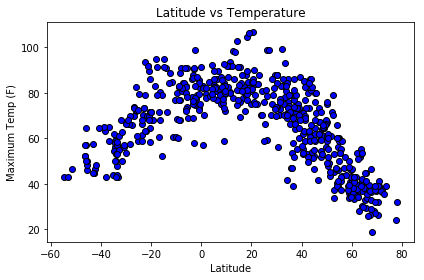

In [127]:
plt.scatter(lat, max_temp, color="blue",edgecolors="black")

plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temp (F)")
plt.tight_layout()

plt.savefig("images/max_temp")
plt.show()


#### Latitude vs. Humidity Plot

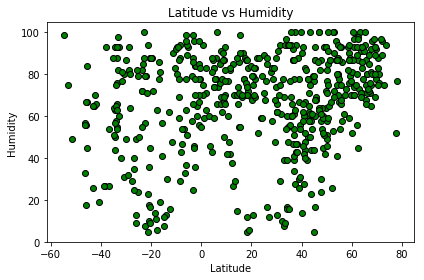

In [128]:
plt.scatter(lat, humidity, color="green",edgecolors="black")

plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.tight_layout()

plt.savefig("images/humidity")
plt.show()

#### Latitude vs. Cloudiness Plot

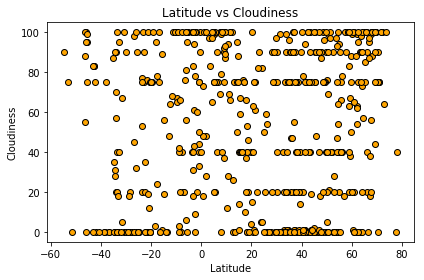

In [129]:
plt.scatter(lat, cloudiness, color="orange",edgecolors="black")

plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.tight_layout()

plt.savefig("images/cloudiness")
plt.show()

#### Latitude vs. Wind Speed Plot

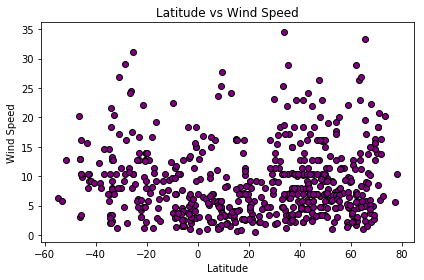

In [130]:
plt.scatter(lat, wind_speed, color="purple",edgecolors="black")

plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.tight_layout()

plt.savefig("images/wind_speed")
plt.show()

## Linear Regression

In [131]:
#  Northern Hemisphere DataFrames
north_weather_df = weather_df.loc[weather_df["Lat"] > 0]
north_weather_df.head()


,City,Country,Lat,Lng,Date,Cloudiness,Humidity,Wind Speed,Max Temp
1,La Ronge,CA,55.10,-105.30,1569169666,20,67,6.93,59.00
2,Longyearbyen,NO,78.22,15.63,1569169667,40,77,10.29,32.00
4,Pipri,IN,24.21,83.02,1569169667,82,79,3.24,80.61
6,Saint George,GR,39.45,22.34,1569169667,20,56,10.29,71.60
12,Yumen,CN,40.29,97.04,1569169669,0,14,15.61,68.37


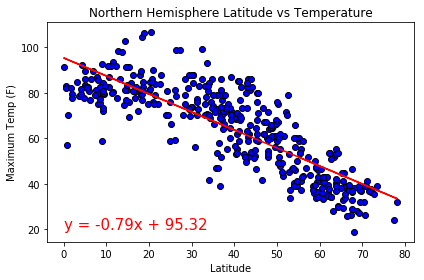

r-squared is -0.83


In [132]:
#  Northern Hemisphere regression
x_values = north_weather_df['Lat']
y_values = north_weather_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#  Northern Hemisphere scatter plot
plt.scatter(x_values, y_values, color="blue",edgecolors="black")
plt.plot(x_values,regress_values,color="red")

#  Northern Hemisphere scatter plot labels, and r-squared value
plt.title("Northern Hemisphere Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temp (F)")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.tight_layout()
plt.savefig("images/n_hemisphere_temp")
plt.show()

print(f"r-squared is {round(rvalue,2)}")


In [133]:
#  Southern Hemisphere DataFrames
south_weather_df = weather_df.loc[weather_df["Lat"] < 0]
south_weather_df.head()


,City,Country,Lat,Lng,Date,Cloudiness,Humidity,Wind Speed,Max Temp
0,Bredasdorp,ZA,-34.53,20.04,1569169666,28,50,6.93,59.0
3,Ushuaia,AR,-54.81,-68.31,1569169429,90,99,6.24,42.8
5,Pitimbu,BR,-7.47,-34.81,1569169667,20,54,10.29,84.2
7,Tuatapere,NZ,-46.13,167.69,1569169668,100,56,13.00,57.0
8,Punta Arenas,CL,-53.16,-70.91,1569169668,75,75,5.82,42.8


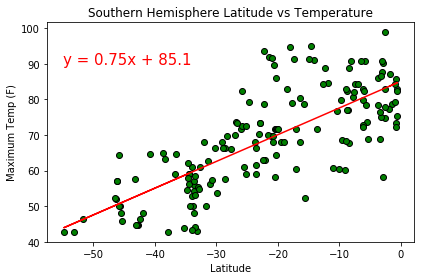

r-squared is 0.76


In [134]:
#  Southern Hemisphere regression
south_x_values = south_weather_df['Lat']
south_y_values = south_weather_df['Max Temp']
(s_slope, s_intercept, s_rvalue, s_pvalue, s_stderr) = linregress(south_x_values, south_y_values)
south_regress_values = south_x_values * s_slope + s_intercept
south_line_eq = "y = " + str(round(s_slope,2)) + "x + " + str(round(s_intercept,2))

#  Northern Hemisphere scatter plot
plt.scatter(south_x_values, south_y_values, color="green",edgecolors="black")
plt.plot(south_x_values,south_regress_values,color="red")

#  Northern Hemisphere scatter plot labels, and r-squared value
plt.title("Southern Hemisphere Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temp (F)")
plt.annotate(south_line_eq,(-55,90),fontsize=15,color="red")
plt.tight_layout()
plt.savefig("images/s_hemisphere_temp")
plt.show()
print(f"r-squared is {round(s_rvalue,2)}")
